# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [4]:
df = pd.read_csv('Missing_911.csv')

** Check the info() of the df **

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [8]:
df['twp'].value_counts().head(10)

twp
LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: count, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [9]:
len(df['title'].value_counts())

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [10]:
def find(x):
    for i in range(0,len(x)-1):
        if x[i] == ':':
            return x[:i]

In [11]:
df['Reason'] = df['title'].apply(lambda x: find(x))

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [13]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

/var/folders/kj/rc1kqy0105v_z1fyv916xn940000gn/T/ipykernel_13513/1737199230.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df,x = 'Reason', palette='rainbow')


<Axes: xlabel='Reason', ylabel='count'>

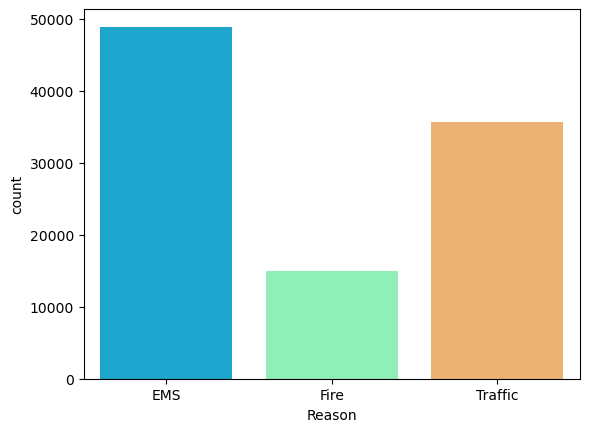

In [14]:
sns.countplot(data = df,x = 'Reason', palette='rainbow')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [15]:
print(df['timeStamp'].dtype)

object


In [16]:
print(df.dtypes)

lat          float64
lng          float64
desc          object
zip          float64
title         object
timeStamp     object
twp           object
addr          object
e              int64
Reason        object
dtype: object


** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [17]:
df['timeStamp_c'] = pd.to_datetime(df['timeStamp'])

In [18]:
print(df.dtypes)

lat                   float64
lng                   float64
desc                   object
zip                   float64
title                  object
timeStamp              object
twp                    object
addr                   object
e                       int64
Reason                 object
timeStamp_c    datetime64[ns]
dtype: object


In [19]:
df['hour'] = df['timeStamp_c'].apply(lambda x: x.hour)
df['month'] = df['timeStamp_c'].apply(lambda x: x.month)
df['day'] = df['timeStamp_c'].apply(lambda x: x.dayofweek)

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStamp_c,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,3


In [21]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [22]:
df['dayofweek'] = df['day'].map(dmap)

In [23]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStamp_c,hour,month,day,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,3,Thu


** Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

<Axes: xlabel='dayofweek', ylabel='count'>

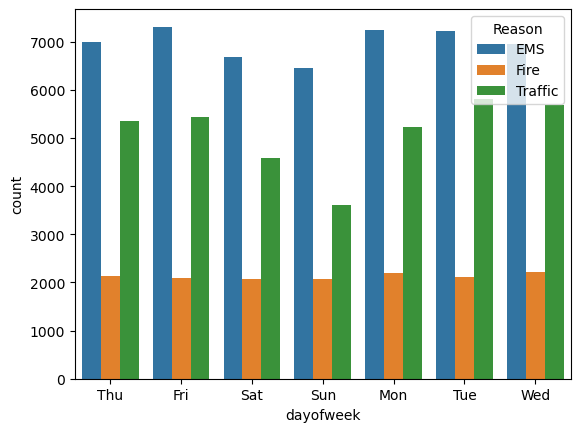

In [24]:
sns.countplot(x = df['dayofweek'], hue = df['Reason'])

** Same for Month:**

<Axes: xlabel='month', ylabel='count'>

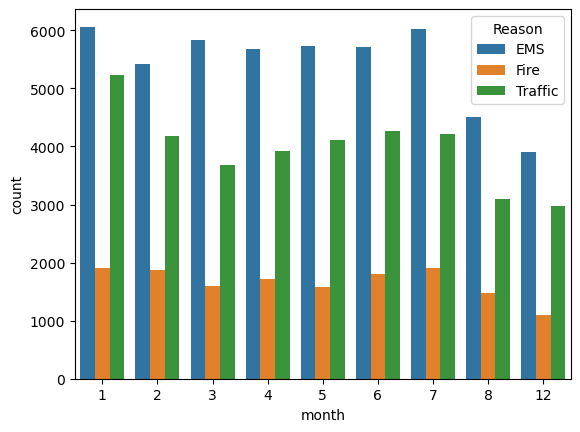

In [25]:
# df['month'].head()
sns.countplot(x = 'month', hue = 'Reason', data = df)

**Did you notice something strange about the Plot?**

_____

** It was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months. **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [26]:
df2 = df.groupby('month').count()

In [27]:
df2

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStamp_c,hour,day,dayofweek
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


In [39]:
groupby = df2.reset_index()

In [40]:
df2.dtypes

month          int64
lat            int64
lng            int64
desc           int64
zip            int64
title          int64
timeStamp      int64
twp            int64
addr           int64
e              int64
Reason         int64
timeStamp_c    int64
hour           int64
day            int64
dayofweek      int64
dtype: object

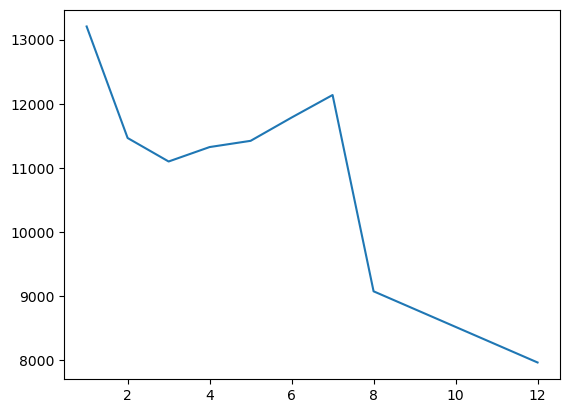

In [41]:
plt.plot(groupby['month'],groupby['timeStamp'])

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [42]:
df2.head()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStamp_c,hour,day,dayofweek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


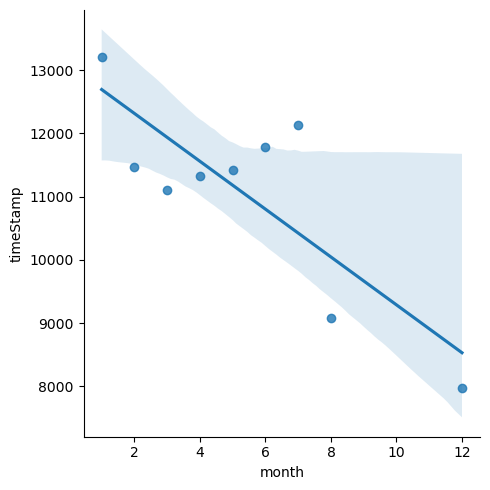

In [43]:
sns.lmplot(data = groupby, x = 'month', y = 'timeStamp')

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [44]:
df['date'] = df['timeStamp_c'].apply(lambda x: x.date())

In [45]:
dfdate = df.groupby(df['date']).count()

In [46]:
df['date'].value_counts().head(10)

date
2016-01-23    913
2016-02-24    679
2016-01-24    662
2016-01-12    588
2016-04-03    586
2016-07-25    580
2016-01-25    575
2016-02-16    560
2016-02-15    541
2015-12-23    524
Name: count, dtype: int64

In [47]:
dfdate = dfdate.reset_index()

In [48]:
dfdate.dtypes

date           object
lat             int64
lng             int64
desc            int64
zip             int64
title           int64
timeStamp       int64
twp             int64
addr            int64
e               int64
Reason          int64
timeStamp_c     int64
hour            int64
month           int64
day             int64
dayofweek       int64
dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

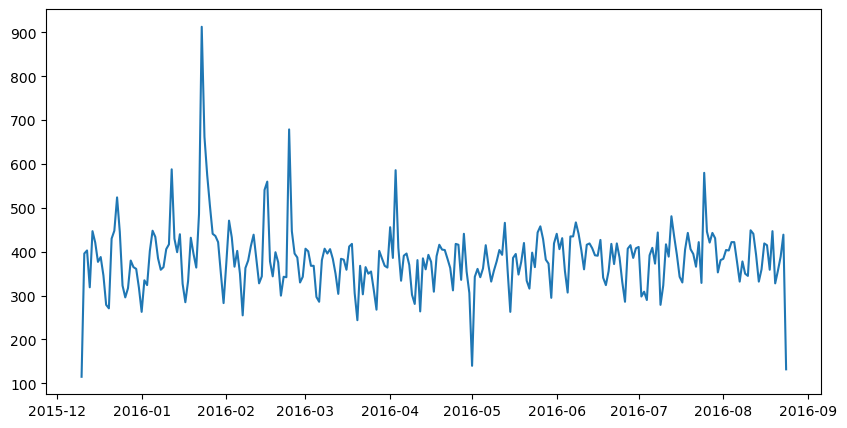

In [49]:

plt.figure(figsize = (10,5))
plt.plot('date', 'timeStamp', data = dfdate)


** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [50]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStamp_c,hour,month,day,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,3,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,3,Thu,2015-12-10


In [51]:
dfdate.head()

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStamp_c,hour,month,day,dayofweek
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447


In [52]:
df['Reason'].value_counts().head(10)

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

In [53]:
dft = df['Reason'] == 'Traffic'

In [54]:
traffic = df[dft].groupby('date').count()
traffic.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStamp_c,hour,month,day,dayofweek
date,,,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186,186,186


In [55]:
traffic.reset_index(inplace = True)

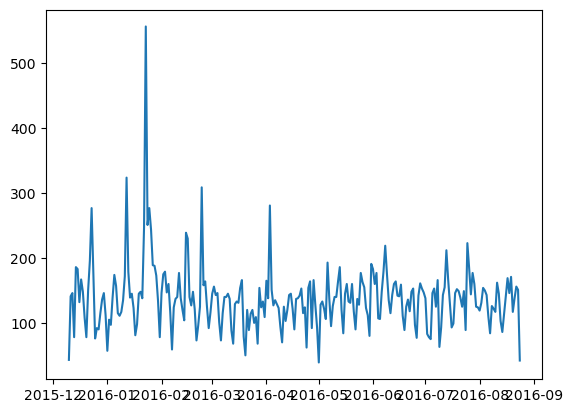

In [56]:
plt.plot('date', 'Reason', data = traffic)

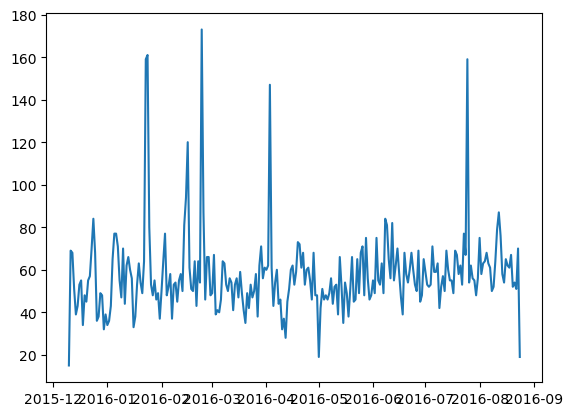

In [57]:
fire = df[df['Reason'] == 'Fire'].groupby('date').count()
fire.reset_index(inplace = True)
plt.plot('date', 'Reason', data = fire)

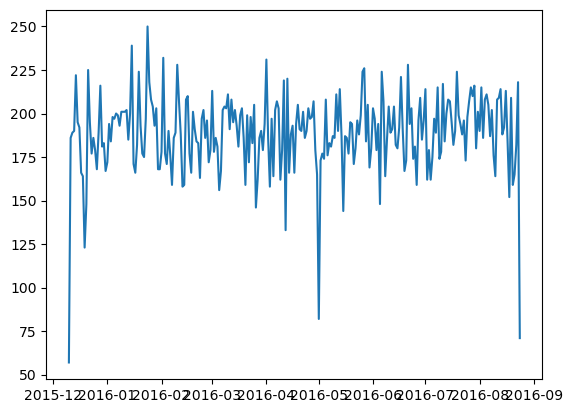

In [58]:
ems = df[df['Reason'] == 'EMS'].groupby('date').count()
ems.reset_index(inplace = True)
plt.plot('date', 'Reason', data = ems)

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [59]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStamp_c,hour,month,day,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,3,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,3,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,3,Thu,2015-12-10


In [60]:
dfdate.head()

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,timeStamp_c,hour,month,day,dayofweek
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447,447


In [61]:
hmdf = pd.pivot_table(df, values= 'Reason', index='dayofweek', columns= 'hour', aggfunc= 'count')

In [62]:
hmdf.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='hour', ylabel='dayofweek'>

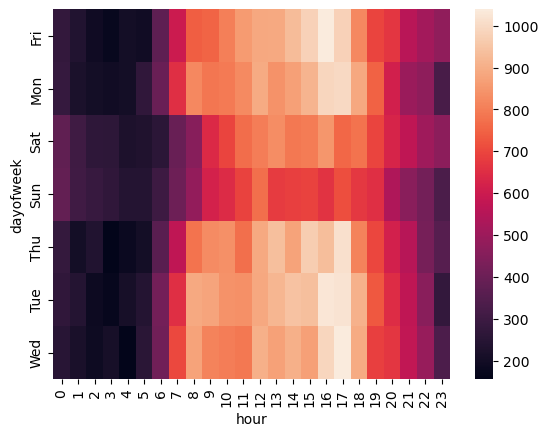

In [65]:
sns.heatmap(data = hmdf)

** Now create a clustermap using this DataFrame. **

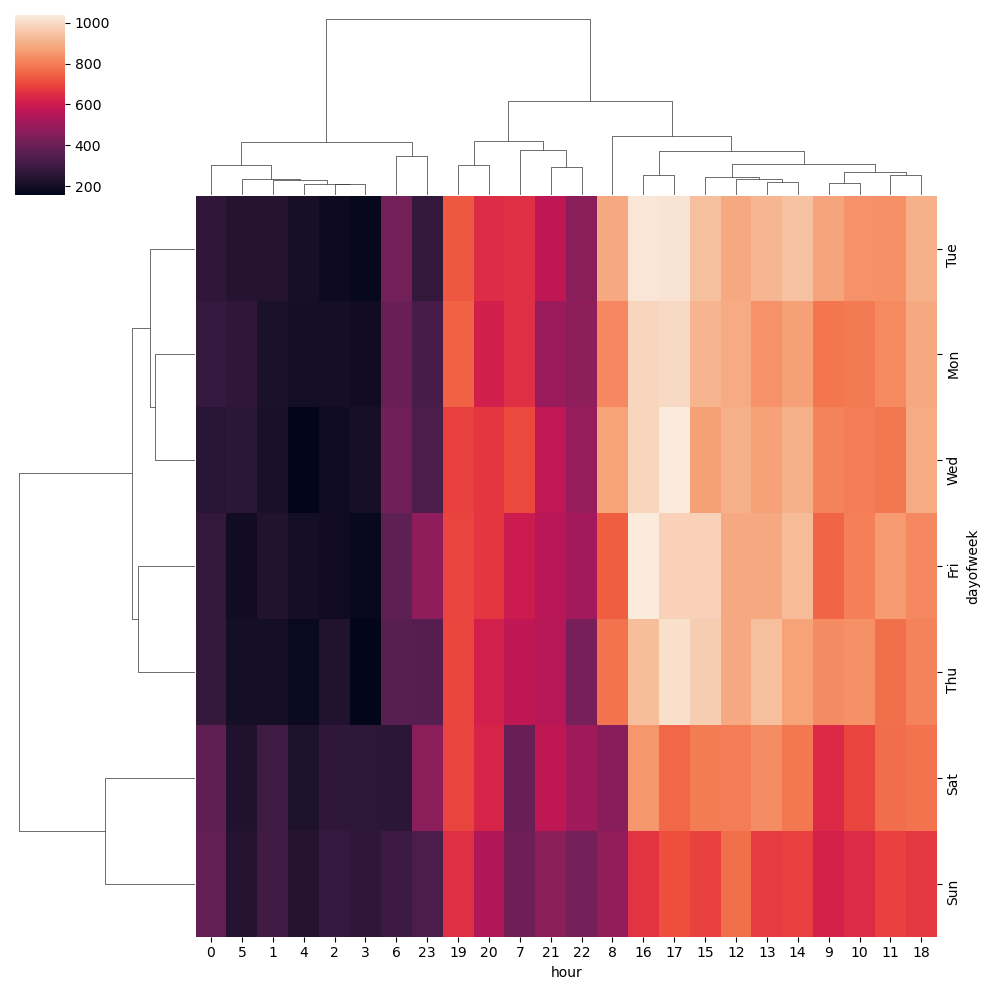

In [66]:
sns.clustermap(hmdf)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [67]:
dfmonth = df.pivot_table(values = 'Reason' , columns = 'month', index = 'dayofweek', aggfunc = 'count')

In [68]:
dfmonth.head()

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='month', ylabel='dayofweek'>

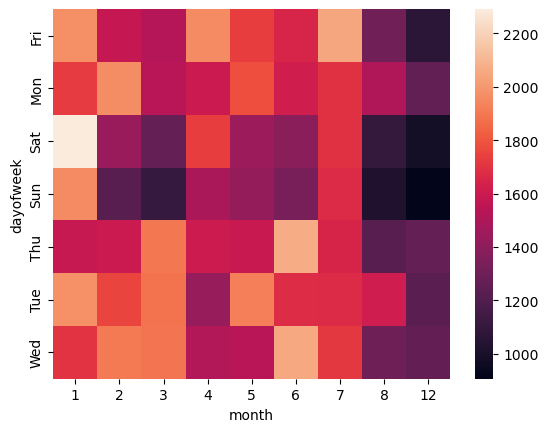

In [69]:
sns.heatmap(dfmonth)

*** THE END ***